In [22]:
%matplotlib inline


import matplotlib.pyplot as plt
from sympy import N, Point, Line
import cv2
import os
import time
import math
import numpy as np
import pandas as pd


INPUT_IMAGE_PATH = '/media/Work/Codes/Private/pdf417-decoder/output/images/Method1/4_Canny/18_03_2021/11.00.00/18_03_2021_11.49.28.553_000/00002_1.bmp'

Max Distance: 710.4400045042509
Max Distance ID: 6
Lap1: 0.0651545524597168
Angle2: 2
Lap2: 0.0008807182312011719


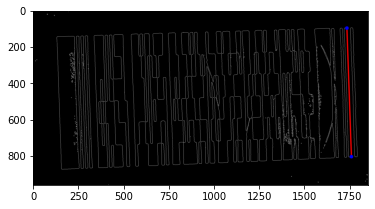

In [16]:
image = cv2.imread(INPUT_IMAGE_PATH, 0)
new_image = cv2.merge((image, image, image))

start = time.time()
lsd = cv2.createLineSegmentDetector(0)
dll = lsd.detect(image)
angless = []
distance_arr = []

x0_arr = []
y0_arr = []
x1_arr = []
y1_arr = []

all_pts = []
l1 = Line((0, 0), (0, 10))

if dll[0] is not None:
    for line in dll[0]:
        x0 = int(round(line[0][0]))
        y0 = int(round(line[0][1]))
        x1 = int(round(line[0][2]))
        y1 = int(round(line[0][3]))

        x0_arr.append(x0)
        y0_arr.append(y0)
        x1_arr.append(x1)
        y1_arr.append(y1)

        all_pts = all_pts + [[x0, y0], [x1, y1]]
        distance = math.sqrt(((x1 - x0) ** 2) + ((y1 - y0) ** 2))
        distance_arr.append(distance)

print(f'Max Distance: {max(distance_arr)}')
max_distant_idx = distance_arr.index(max(distance_arr))
print(f'Max Distance ID: {max_distant_idx}')

max_x0 = x0_arr[max_distant_idx]
max_y0 = y0_arr[max_distant_idx]
max_x1 = x1_arr[max_distant_idx]
max_y1 = y1_arr[max_distant_idx]

lap1 = time.time()
print(f'Lap1: {lap1 - start}')

l2 = Line((max_x0, max_y0), (max_x1, max_y1))
angle = l1.smallest_angle_between(l2)
angle = int(math.degrees(angle))

print(f'Angle2: {angle}')
lap2 = time.time()

print(f'Lap2: {lap2 - lap1}')

cv2.line(new_image, (max_x0, max_y0), (max_x1, max_y1), 255, 5, cv2.LINE_AA)
cv2.circle(new_image, (max_x0, max_y0), 10, (0, 0, 255), -1)
cv2.circle(new_image, (max_x1, max_y1), 10, (0, 0, 255), -1)

plt.imshow(new_image)

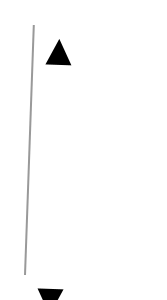

In [17]:
l2

In [19]:
l3 = l2.perpendicular_line(Point(0, 0))

In [20]:
all_pts = [Point(x[0], x[1]) for x in all_pts]
all_pts

[Point2D(1731, 92),
 Point2D(1719, 92),
 Point2D(1621, 94),
 Point2D(1558, 97),
 Point2D(1770, 121),
 Point2D(1768, 93),
 Point2D(1659, 95),
 Point2D(1649, 96),
 Point2D(1718, 94),
 Point2D(1719, 143),
 Point2D(1720, 104),
 Point2D(1721, 94),
 Point2D(1759, 804),
 Point2D(1734, 94),
 Point2D(1765, 94),
 Point2D(1768, 121),
 Point2D(1561, 99),
 Point2D(1634, 96),
 Point2D(1695, 96),
 Point2D(1695, 113),
 Point2D(1492, 97),
 Point2D(1463, 100),
 Point2D(1665, 108),
 Point2D(1663, 97),
 Point2D(1708, 97),
 Point2D(1710, 132),
 Point2D(1713, 132),
 Point2D(1711, 97),
 Point2D(1662, 98),
 Point2D(1663, 163),
 Point2D(1702, 199),
 Point2D(1696, 98),
 Point2D(1733, 98),
 Point2D(1733, 158),
 Point2D(1752, 98),
 Point2D(1753, 133),
 Point2D(1389, 100),
 Point2D(1358, 102),
 Point2D(1412, 100),
 Point2D(1404, 103),
 Point2D(1439, 101),
 Point2D(1428, 100),
 Point2D(1466, 102),
 Point2D(1496, 99),
 Point2D(1428, 101),
 Point2D(1425, 109),
 Point2D(1554, 101),
 Point2D(1559, 163),
 Point2D(1639, 

In [26]:
distances = sorted([float(l3.distance(pt)) for pt in all_pts])
distances

[143.94600437986472,
 144.19233059867346,
 144.26974741029906,
 144.38939157372045,
 144.5583009809036,
 144.68498303629093,
 144.68498303629093,
 144.7131346041548,
 144.8116650916783,
 145.00168817475932,
 145.17059758194247,
 145.19874914980633,
 145.20578704177228,
 145.38877223288736,
 145.5013785043428,
 145.59287109990032,
 145.59990899186627,
 145.77585629101537,
 145.79696996691328,
 145.86031099460695,
 145.91661413033466,
 145.97995515802836,
 146.0292204017901,
 146.2051677009392,
 146.26850872863287,
 146.28962240453077,
 146.35296343222444,
 146.36000132419042,
 146.444456027782,
 146.55002440727145,
 146.56410019120338,
 146.63447911086303,
 146.64855489479496,
 146.66966857069283,
 146.6978201385567,
 146.71893381445457,
 147.08490419668473,
 147.225662036004,
 147.31715463156155,
 147.3593819833573,
 147.38753355122117,
 147.4016093351531,
 147.41568511908503,
 147.47198825481274,
 147.57051874233625,
 147.5775566343022,
 147.5775566343022,
 147.61274609413204,
 147.67

In [27]:
start = time.time()
distance = float(l3.distance(all_pts[0]))
end = time.time()
end - start

0.025119543075561523

In [30]:
def all_corners(var_gray_img, threshold=0.12):

    corners = cv2.goodFeaturesToTrack(var_gray_img, 1000, threshold, 10)
    var_all_corners = np.array(tuple(map(np.ravel, corners)), dtype=np.int0)
    
    return var_all_corners

In [31]:
def overlay_corners(image, corners, radius, color, inplace=False):
    if not inplace:
        overlaid_image = copy.deepcopy(image)
    else:
        overlaid_image = image

    corners = tuple(map(tuple, corners))
    for corner in corners:
        cv2.circle(overlaid_image, corner, radius, color, -1)
    return overlaid_image

In [39]:
var_all_corners = all_corners(image, threshold=0.3)

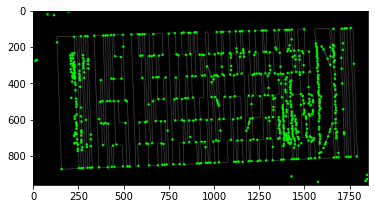

In [40]:
pt1_thickness, pt1_color = 7, (0, 255, 0)

debug_image = cv2.merge((image, image, image)) 
debug_image = overlay_corners(debug_image, var_all_corners, pt1_thickness, pt1_color, inplace=True)
cv2.imwrite('/media/Work/Codes/Private/pdf417-decoder/output/images/Corners/corner_0.3.bmp', debug_image)
plt.imshow(debug_image)

[0.0, 0.0, 1.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 0.0, 0.0, 0.5, 1.0, 1.0, 4.0, 2.0, 0.0, 0.0, 0.5, 0.5, 0.0, 4.0, 2.0, 0.0, 4.0, 2.0, 4.0, 2.0, 0.5, 1.0, 0.0, 0.0, 0.0, 4.0, 2.0, 0.0, 8.0, 6.0, 4.0, 2.0, 4.0, 2.0, 0.0, 0.5, 1.0, 7.0, 1.0, 9.0, 7.0, 0.0, 0.0, 1.0, 0.0, 7.5, 4.0, 2.0, 9.0, 7.0, 0.0, 0.5, 0.0, 0.0, 2.5, 1.5, 0.0, 1.0, 12.0, 9.5, 0.0, 0.0, 0.0, 3.5, 2.0, 0.0, 3.0, 1.0, 4.0, 1.0, 1.0, 0.0, 0.5, 0.5, 1.0, 5.5, 2.0, 2.0, 0.5, 1.0, 1.0, 3.5, 2.0, 1.0, 0.0, 0.5, 1.0, 2614.0, 2602.0, 0.0, 0.0, 4.0, 2.0, 1.0, 1.0, 1.0, 0.0, 4.0, 2.0, 0.0, 0.5, 4.0, 2.0, 0.5, 4.0, 2.0, 1.5, 0.5, 0.5, 1.0, 3.5, 2.0, 0.0, 0.0, 1.0, 1.0, 0.5, 3.5, 2.0, 0.0, 4.0, 2.0, 0.5, 1.0, 0.5, 0.0, 4.0, 2.0, 1.0, 9.0, 7.0, 4.5, 15.0, 2.0, 0.0, 0.0, 0.0, 9.5, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 2.0, 0.0, 0.5, 0.0, 0.0, 2.0, 0.0, 1.0, 12.5, 11.0, 0.5, 1.0, 0.5, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 3.5, 2.0, 1.0, 0.0, 3.5, 2.0, 0.0, 0.5, 3.5, 2.0, 2.0, 0.0, 1.5, 0.5, 4.5, 0.0, 0.0, 3.5, 2.0, 0.0, 0.0, 0.0, 0.5,

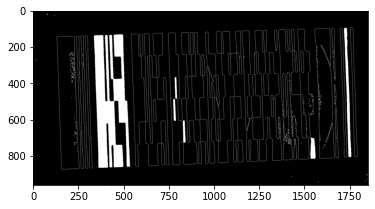

In [42]:
_,contours, hierarchy = cv2.findContours(image,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

area_arr = []
for c in contours:
    area_arr.append(cv2.contourArea(c))
print(area_arr)

c_max = max(contours, key = cv2.contourArea)
for c_max in contours:
    immask=cv2.drawContours(image,[c_max], 0, 255, -1)
    
plt.imshow(immask, cmap='gray')

In [43]:
sorted(area_arr)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0